# Plan

* organizar preprocesamiento
 * corregir fecha TRM
* Dejar Solo funciones
* programar ciclos
* dejar registro quiebras
* dejar registro cuantos quiebran y sobreviven
* analizar resultados en otro script
 * hurst
 * ley potencia
* probar con nuevo resultado
* probar con otro indice
* fin


# Librerías y configuraciones generales

In [1]:
import pandas as pd
from random import randrange
import random
import math
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
import warnings

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Preprocesamiento 
* Carga datos de entrada

In [4]:
rango_lectura=['2020-10-09','2021-05-18']
rango_indice=['2020-09-09','2021-05-18']

In [5]:
base_rss = pd.read_csv (r'TranformacionBases_Java/Rss_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')
base_twitter = pd.read_csv (r'TranformacionBases_Java/Twitter_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [6]:
# rangos datos lecturas
print("rango rss: min: ",min(base_rss['date_adj']), " max: ",max(base_rss['date_adj']))
print("rango twitter: min: ",min(base_twitter['date']), " max: ",max(base_twitter['date']))

rango rss: min:  2020-10-09  max:  2021-05-18
rango twitter: min:  2020-10-05  max:  2021-05-30


In [7]:
datos_twitter=base_twitter[['id_fuente','date','polaridad']].groupby(['id_fuente','date']).mean().reset_index()
datos_twitter

,id_fuente,date,polaridad
0,BluRadioCo,2020-10-09,-0.347026
1,BluRadioCo,2020-10-10,-0.271511
2,BluRadioCo,2020-10-11,-0.635847
3,BluRadioCo,2020-10-25,-0.249044
4,BluRadioCo,2020-10-26,-0.410109
...,...,...,...
4123,rcnradio,2021-05-26,-0.692930
4124,rcnradio,2021-05-27,-0.619450
4125,rcnradio,2021-05-28,-0.528466
4126,rcnradio,2021-05-29,-0.505510


In [8]:
datos_twitter['date'] = pd.to_datetime(datos_twitter['date'])

In [9]:
datos_rss=base_rss[['fuenteRss','date','polaridad']].groupby(['fuenteRss','date']).mean().reset_index()
datos_rss

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,1/11/2020 04:00,-0.986164
1,http://elnacional.com.do/feed/,1/11/2020 12:00,-0.975831
2,http://elnacional.com.do/feed/,1/11/2020 12:09,-0.105395
3,http://elnacional.com.do/feed/,1/11/2020 12:41,0.157199
4,http://elnacional.com.do/feed/,1/11/2020 12:44,-0.378361
...,...,...,...
110015,https://www.reforma.com/rss/portada.xml,9/5/2021 05:02,-0.989599
110016,https://www.reforma.com/rss/portada.xml,9/5/2021 11:01,-0.810466
110017,https://www.reforma.com/rss/portada.xml,9/5/2021 15:19,0.423649
110018,https://www.reforma.com/rss/portada.xml,9/5/2021 15:49,-0.641010


In [10]:
datos_rss['date'] = pd.to_datetime(datos_rss['date'])

In [11]:
##igualar rangos

In [12]:
datos_trm=pd.read_csv (r'TranformacionBases_Java/TRM_total_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [13]:
datos_trm=datos_trm[datos_trm['date']>=rango_indice[0]]
datos_trm=datos_trm[datos_trm['date']<=rango_indice[1]]

In [14]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.21,54.59,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.09,-6.00,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16,2021-05-17


In [15]:
datos_trm['date'] = pd.to_datetime(datos_trm['date'])

In [16]:
datos_twitter.columns=['fuente','date','polaridad']
datos_rss.columns=['fuente','date','polaridad']

In [17]:
datos_rss

,fuente,date,polaridad
0,http://elnacional.com.do/feed/,2020-01-11 04:00:00,-0.986164
1,http://elnacional.com.do/feed/,2020-01-11 12:00:00,-0.975831
2,http://elnacional.com.do/feed/,2020-01-11 12:09:00,-0.105395
3,http://elnacional.com.do/feed/,2020-01-11 12:41:00,0.157199
4,http://elnacional.com.do/feed/,2020-01-11 12:44:00,-0.378361
...,...,...,...
110015,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599
110016,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466
110017,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649
110018,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010


In [18]:
datos_lectura=datos_twitter.append(datos_rss)

In [19]:
datos_lectura

,fuente,date,polaridad
0,BluRadioCo,2020-10-09 00:00:00,-0.347026
1,BluRadioCo,2020-10-10 00:00:00,-0.271511
2,BluRadioCo,2020-10-11 00:00:00,-0.635847
3,BluRadioCo,2020-10-25 00:00:00,-0.249044
4,BluRadioCo,2020-10-26 00:00:00,-0.410109
...,...,...,...
110015,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599
110016,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466
110017,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649
110018,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010


In [20]:
datos_lectura=datos_lectura[datos_lectura['polaridad']!=0]

## Carga Maestro Fuentes

In [21]:
base_maestro_fuentes = pd.read_csv (r'TranformacionBases_Java/maestro_fuentes.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [22]:
base_maestro_fuentes.reset_index()

,index,fuente,tipo
0,0,http://elnacional.com.do/feed/,rss
1,1,http://ep00.epimg.net/rss/economia/portada.xml,rss
2,2,http://ep00.epimg.net/rss/tags/ultimas_noticia...,rss
3,3,http://feeds.nytimes.com/nyt/rss/Business,rss
4,4,http://feeds.nytimes.com/nyt/rss/Technology,rss
...,...,...,...
132,132,elcolombiano,twitter
133,133,elespectador,twitter
134,134,lafm,twitter
135,135,rcnmundo,twitter


In [23]:
datos_lectura=datos_lectura.merge(base_maestro_fuentes.reset_index(), left_on='fuente', right_on='fuente', how='left')
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09 00:00:00,-0.347026,118,twitter
1,BluRadioCo,2020-10-10 00:00:00,-0.271511,118,twitter
2,BluRadioCo,2020-10-11 00:00:00,-0.635847,118,twitter
3,BluRadioCo,2020-10-25 00:00:00,-0.249044,118,twitter
4,BluRadioCo,2020-10-26 00:00:00,-0.410109,118,twitter
...,...,...,...,...,...
104999,https://www.reforma.com/rss/portada.xml,2021-09-05 05:02:00,-0.989599,117,rss
105000,https://www.reforma.com/rss/portada.xml,2021-09-05 11:01:00,-0.810466,117,rss
105001,https://www.reforma.com/rss/portada.xml,2021-09-05 15:19:00,0.423649,117,rss
105002,https://www.reforma.com/rss/portada.xml,2021-09-05 15:49:00,-0.641010,117,rss


## Calendario

In [24]:
calendario = pd.DataFrame({"Date": pd.date_range(rango_indice[0], rango_indice[1])})

In [25]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
247,2021-05-14
248,2021-05-15
249,2021-05-16
250,2021-05-17


# Agente

In [26]:
def crearAgente(id,tipo): #quizas falta el valor del var econ,
    agente={}
    agente['TIPO']=tipo
    agente['id']=id
    agente['edad']=0
    agente['capital']= randrange(1000,1000000000)
    agente['stockProducto']=randrange(10,1000000)
    agente['umbralStock']=randrange(10,1000000)
    agente['habilidadAdministrativa']=random.uniform(-0.02, 0.5)
    #agente['tasaConsumo']=random.uniform(0.1, 0.5)
    if agente['TIPO']=='Comprador':
        agente['rentabilidad']=random.uniform(0.1, 0.2)
    elif agente['TIPO']=='Vendedor':
        agente['rentabilidad']=random.uniform(0.2, 0.6)
    agente['tamanoRegresion']= randrange(5,20)
    # perfilIntereses  No aplica
    agente['impactoTextos']=random.uniform(-1, 1)
    agente['estrategiaLectura']=[0]*NUM_FUENTES_INTERPRETACION
    agente['estrategiaLectura_imp']=[0]*NUM_FUENTES_INTERPRETACION
    for i in range(NUM_FUENTES_INTERPRETACION):
        agente['estrategiaLectura'][i]=randrange(NUM_FUENTES_TOTATALES)
        agente['estrategiaLectura_imp'][i]=random.random()
    agente['numeroDiasLecturas']=randrange(2,7)
    agente['umbralPronostico']=random.uniform(0.2, 0.5)
    agente['porcentajeCapitalCompra']=random.uniform(0, 1)
    agente['porcentajeStockVenta']=random.uniform(0, 1)
    #agente['costoMauc']  costo del commoditie según bolsa
    #agente['costosFijos']=random.uniform(0.1, 0.3)
    agente['tasaProduccion']=random.uniform(0, 0.5)
    #agente['limiteSobrePrecio']=random.uniform(0.01, 0.3)
    agente['viveza']=random.uniform(0.005, 0.02)
    agente['controlGastosEImpuestos']=random.uniform(0.01, 0.1)
    return agente

In [27]:
def pronosticoAgente(agente):    
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
    rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
    serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

    modelo_agente=SimpleExpSmoothing(serie_indice_agente['TRM']).fit(smoothing_level=0.5,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()

    prediccion_base_agente=prediccion_base_agente.values[0]
    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})

    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']
    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]
    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
        
    return pronosticos_dia_siguiente

In [28]:
def activacionComprador(agente):
    #cuando
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']<agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto comprar
    agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar
    #precio negociacion
    agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE
    return agente['activo']

In [29]:
def activacionVendedor(agente):
    #cuando vender
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']>agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto vender
    agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']
    #precio negociacion
    agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE
    return agente['activo']

In [30]:
def transaccionarAgente(agenteComprador,agenteVendedor):
    #id agentes
    idComprador=agenteComprador.get('id')
    idVendedor=agenteVendedor.get('id')    
    #definir cantidad transaccionar
    cantidadRequeridaComprador=agenteComprador['cantidadTransaccionar']
    cantidadDisponibleVendedor=agenteVendedor['cantidadTransaccionar']
    cantidadTransaccion= cantidadRequeridaComprador if cantidadRequeridaComprador<cantidadDisponibleVendedor else cantidadDisponibleVendedor
    #precio transaccion
    precioTransaccion=agenteVendedor['precioNegociacion']
    #numeroPulsoActual
    #FECHA_PULSO
    
    #Cambio estado agentes
    #comprador
    agenteComprador['capital']=agenteComprador['capital']-precioTransaccion*cantidadTransaccion
    ##sin costo mauc
    agenteComprador['stockProducto']=agenteComprador['stockProducto']+cantidadTransaccion
    agenteComprador['cantidadTransaccionar']=agenteComprador['cantidadTransaccionar']-cantidadTransaccion
    #vendedor
    agenteVendedor['capital']=agenteVendedor['capital']+precioTransaccion*cantidadTransaccion
    agenteVendedor['stockProducto']=agenteVendedor['stockProducto']-cantidadTransaccion
    agenteVendedor['cantidadTransaccionar']=agenteVendedor['cantidadTransaccionar']-cantidadTransaccion
    #validar activacion agentes, retornar para acciones
    desactivarComprador=agenteComprador['cantidadTransaccionar']==0
    desactivarVendedor=agenteVendedor['cantidadTransaccionar']==0
    lineaTransaccion=[idComprador,idVendedor,cantidadTransaccion,precioTransaccion,FECHA_PULSO]
    #return {'desact_comp':desactivarComprador, 'desact_vend':desactivarVendedor, 'lineaTransaccion':lineaTransaccion}
    return [desactivarComprador, desactivarVendedor, lineaTransaccion]

In [31]:
def vivirComprador(agente):
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #reevaluar costos fijos 
    #aumentar edad
    agente['edad']=agente['edad']+1

In [32]:
def vivirVendedor(agente):
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #le cuesta producir
    agente['capital']=agente['capital']*(1-agente['habilidadAdministrativa'])*agente['tasaProduccion']
    #aumenta el stock con lo producido
    agente['stockProducto']=agente['stockProducto']+agente['stockProducto']*agente['tasaProduccion']
    #aumenta edad
    agente['edad']=agente['edad']+1

# Universo

In [33]:
#GENERACION ESPONTANEA UNIVERSO
def generacionEspontanea():     
    global NUMERO_ACUMULADO_AGENTES
    for i in range(POBLACION_INICIAL):
        NUMERO_ACUMULADO_AGENTES=NUMERO_ACUMULADO_AGENTES+1
        if(random.random()<=CANT_COMPRADORES):            
            compradores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Comprador'))
        else:
            vendedores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Vendedor'))

In [34]:
def quiebraEmpresas():
    #quiebraEmpresas    
    for comp in compradores:
        capiltalEmpresa=comp['capital']
        valorStockEmpresa=comp['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("COMP capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraComp")
            compradores.remove(comp)     
            agentesQuebrados.append(comp)
    for vend in vendedores:
        capiltalEmpresa=vend['capital']
        valorStockEmpresa=vend['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("VEND capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraVend")
            vendedores.remove(vend)
            agentesQuebrados.append(vend)

In [35]:
def nuevosAgentes():
    global NUMERO_ACUMULADO_AGENTES
    #num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    print("max_generacion_agentes: ",MAX_GENERACION_AGENTES,"nuevos Agentes: ", num_nuevos_agentes, "pob actual: ",POBLACION_ACTUAL, "pob final: ",POBLACION_ACTUAL+num_nuevos_agentes)
    for i in range(POBLACION_ACTUAL,POBLACION_ACTUAL+num_nuevos_agentes):
        NUMERO_ACUMULADO_AGENTES=NUMERO_ACUMULADO_AGENTES+1
        if(random.random()<=CANT_COMPRADORES):
            compradores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Comprador'))
        else:
            vendedores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Vendedor'))

In [36]:
def pronosticoUniverso():
    for comp in compradores:
        #print(pronosticoAgente(comp))
        comp['pronosticos_dia_siguiente']=pronosticoAgente(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        vend['pronosticos_dia_siguiente']=pronosticoAgente(vend)

In [37]:
def activacionUniverso():
    for comp in compradores:
        #print(pronosticoAgente(comp))
        auxActivacion=activacionComprador(comp)
        if auxActivacion:
            compradoresActivos.append(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        auxActivacion=activacionVendedor(vend)
        if auxActivacion:
            vendedoresActivos.append(vend)

In [38]:
### Función transaccionar
def transaccionarUniverso():
    random.shuffle(compradoresActivos)
    
    for comp in compradoresActivos:     
        if len(vendedoresActivos)==0:
            #print("no hay vendedores")
            break

        df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')
        mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
        compradorMomento=comp

        precioMaximoCompra=compradorMomento['precioNegociacion']
        precioMinimoVenta=mejorVendedor['precioNegociacion']
        #selecciona si puede transaccionar
        if precioMaximoCompra>precioMinimoVenta:
            #print("transaccionar")
            #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
            (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
            #agregar transaccion a arreglo de transacciones con datos principales
            if desactivarComprador:
                compradoresActivos.remove(compradorMomento)
            if desactivarVendedor:
                vendedoresActivos.remove(mejorVendedor) 
            #registra la transacción
            DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion

In [39]:
def vivirUniverso():
    for comp in compradores:
        vivirComprador(comp)
    for vend in vendedores:
        vivirVendedor(vend)

# SIMULACION

## Parametros Globales

In [40]:
#AGENTES
NUM_FUENTES_TOTATALES=137
NUM_FUENTES_INTERPRETACION=5

In [41]:
#UNIVERSO
POBLACION_INICIAL=1000
CANT_COMPRADORES=0.6

#LIMITE_QUIEBRA=1000
LIMITE_QUIEBRA=10000000
MAX_GENERACION_AGENTES=0.02

POBLACION_ACTUAL=0

In [42]:
FECHA_INICIAL_PULSO=36
FECHA_PULSO=FECHA_INICIAL_PULSO   #fecha inicial con información suficiente

In [43]:
NUMERO_ACUMULADO_AGENTES=0

In [44]:
#tipo_indice='real'
tipo_indice='emergente'

In [45]:
VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [46]:
#VALOR_MOMENTO_INDICE

In [47]:
DF_TRANSACCIONES=pd.DataFrame(columns=['idComprador','idVendedor','cantidadTransaccion','precioTransaccion','fechaPulso']) ###llevar antes al algoritmo

In [48]:
compradores=[]
vendedores=[]

In [49]:
NUMERO_ACUMULADO_AGENTES

0

In [50]:
generacionEspontanea()

In [51]:
print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))

numCompradores:  603 numVendedores:  397


In [52]:
agentesQuebrados=[]

### ciclos simulacion

In [53]:
252-FECHA_PULSO

216

In [54]:
len(vendedores)

397

In [55]:
#pensar en agregar un número fijo de agentes

In [56]:
aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']*aux_df_agentC['capital']
aux_df_agentC['pulso']=FECHA_PULSO-1
aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']*aux_df_agentV['capital']
aux_df_agentV['pulso']=FECHA_PULSO-1
df_estadoAgentes=aux_df_agentC
df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
df_estadoAgentes

,id,TIPO,edad,capital,stockProducto,val_stock,val_empresa,pulso
0,1,Comprador,0,900492417,355992,1.368287e+09,1.232132e+18,35
1,2,Comprador,0,206042147,913028,3.509305e+09,7.230648e+17,35
2,3,Comprador,0,955478966,187698,7.214342e+08,6.893152e+17,35
3,5,Comprador,0,100476390,804846,3.093498e+09,3.108235e+17,35
4,6,Comprador,0,909529517,234892,9.028285e+08,8.211492e+17,35
...,...,...,...,...,...,...,...,...
392,995,Vendedor,0,605797218,608179,2.337591e+09,1.416106e+18,35
393,996,Vendedor,0,140826405,252569,9.707717e+08,1.367103e+17,35
394,997,Vendedor,0,161413825,30046,1.154845e+08,1.864080e+16,35
395,998,Vendedor,0,140464531,650707,2.501051e+09,3.513089e+17,35


In [57]:
#df_estadoAgentes=pd.DataFrame.from_dict(compradores)
#df_estadoAgentes=df_estadoAgentes.append(pd.DataFrame.from_dict(vendedores))

In [58]:
#for generacion in range(0,100,1):
for generacion in range(0,len(calendario)-FECHA_INICIAL_PULSO,1):
    if tipo_indice=='real' or generacion==0:
        VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
    elif tipo_indice=='emergente':
        aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
        aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
        #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
        VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
        
    POBLACION_ACTUAL=len(compradores)+len(vendedores)    
    quiebraEmpresas()# capturar información de agentes quebrados
    POBLACION_ACTUAL=len(compradores)+len(vendedores)
    print("PULSO: ",FECHA_PULSO, "Generacion: ",generacion, " poblacion actual: ",POBLACION_ACTUAL,' numero acumulado agentes: ',NUMERO_ACUMULADO_AGENTES)
    nuevosAgentes()
    #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))
    pronosticoUniverso()
    compradoresActivos=[]
    vendedoresActivos=[]
    activacionUniverso()
    #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
    transaccionarUniverso()
    #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
    vivirUniverso()
    print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores) )
    ## capturar estado empresas
    if len(compradores)>0:
        aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']+aux_df_agentC['capital']
        aux_df_agentC['pulso']=FECHA_PULSO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agentC)
        
    if len(vendedores)>0:
        aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']+aux_df_agentV['capital']
        aux_df_agentV['pulso']=FECHA_PULSO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
        
    FECHA_PULSO=FECHA_PULSO+1

PULSO:  36 Generacion:  0  poblacion actual:  987  numero acumulado agentes:  1000
max_generacion_agentes:  0.02 nuevos Agentes:  4 pob actual:  987 pob final:  991
numCompradores:  599 numVendedores:  392
PULSO:  37 Generacion:  1  poblacion actual:  954  numero acumulado agentes:  1004
max_generacion_agentes:  0.02 nuevos Agentes:  9 pob actual:  954 pob final:  963
numCompradores:  605 numVendedores:  358
PULSO:  38 Generacion:  2  poblacion actual:  885  numero acumulado agentes:  1013
max_generacion_agentes:  0.02 nuevos Agentes:  0 pob actual:  885 pob final:  885
numCompradores:  602 numVendedores:  283
PULSO:  39 Generacion:  3  poblacion actual:  800  numero acumulado agentes:  1013
max_generacion_agentes:  0.02 nuevos Agentes:  14 pob actual:  800 pob final:  814
numCompradores:  609 numVendedores:  205
PULSO:  40 Generacion:  4  poblacion actual:  757  numero acumulado agentes:  1027
max_generacion_agentes:  0.02 nuevos Agentes:  11 pob actual:  757 pob final:  768
numCompra

numCompradores:  745 numVendedores:  8
PULSO:  76 Generacion:  40  poblacion actual:  752  numero acumulado agentes:  1298
max_generacion_agentes:  0.02 nuevos Agentes:  3 pob actual:  752 pob final:  755
numCompradores:  747 numVendedores:  8
PULSO:  77 Generacion:  41  poblacion actual:  750  numero acumulado agentes:  1301
max_generacion_agentes:  0.02 nuevos Agentes:  14 pob actual:  750 pob final:  764
numCompradores:  751 numVendedores:  13
PULSO:  78 Generacion:  42  poblacion actual:  760  numero acumulado agentes:  1315
max_generacion_agentes:  0.02 nuevos Agentes:  3 pob actual:  760 pob final:  763
numCompradores:  752 numVendedores:  11
PULSO:  79 Generacion:  43  poblacion actual:  760  numero acumulado agentes:  1318
max_generacion_agentes:  0.02 nuevos Agentes:  14 pob actual:  760 pob final:  774
numCompradores:  762 numVendedores:  12
PULSO:  80 Generacion:  44  poblacion actual:  768  numero acumulado agentes:  1332
max_generacion_agentes:  0.02 nuevos Agentes:  7 pob

numCompradores:  893 numVendedores:  8
PULSO:  116 Generacion:  80  poblacion actual:  899  numero acumulado agentes:  1590
max_generacion_agentes:  0.02 nuevos Agentes:  15 pob actual:  899 pob final:  914
numCompradores:  899 numVendedores:  15
PULSO:  117 Generacion:  81  poblacion actual:  909  numero acumulado agentes:  1605
max_generacion_agentes:  0.02 nuevos Agentes:  13 pob actual:  909 pob final:  922
numCompradores:  904 numVendedores:  18
PULSO:  118 Generacion:  82  poblacion actual:  917  numero acumulado agentes:  1618
max_generacion_agentes:  0.02 nuevos Agentes:  17 pob actual:  917 pob final:  934
numCompradores:  914 numVendedores:  20
PULSO:  119 Generacion:  83  poblacion actual:  926  numero acumulado agentes:  1635
max_generacion_agentes:  0.02 nuevos Agentes:  6 pob actual:  926 pob final:  932
numCompradores:  917 numVendedores:  15
PULSO:  120 Generacion:  84  poblacion actual:  927  numero acumulado agentes:  1641
max_generacion_agentes:  0.02 nuevos Agentes:

numCompradores:  1074 numVendedores:  16
PULSO:  156 Generacion:  120  poblacion actual:  1087  numero acumulado agentes:  2005
max_generacion_agentes:  0.02 nuevos Agentes:  7 pob actual:  1087 pob final:  1094
numCompradores:  1078 numVendedores:  16
PULSO:  157 Generacion:  121  poblacion actual:  1090  numero acumulado agentes:  2012
max_generacion_agentes:  0.02 nuevos Agentes:  16 pob actual:  1090 pob final:  1106
numCompradores:  1087 numVendedores:  19
PULSO:  158 Generacion:  122  poblacion actual:  1099  numero acumulado agentes:  2028
max_generacion_agentes:  0.02 nuevos Agentes:  17 pob actual:  1099 pob final:  1116
numCompradores:  1090 numVendedores:  26
PULSO:  159 Generacion:  123  poblacion actual:  1112  numero acumulado agentes:  2045
max_generacion_agentes:  0.02 nuevos Agentes:  10 pob actual:  1112 pob final:  1122
numCompradores:  1094 numVendedores:  28
PULSO:  160 Generacion:  124  poblacion actual:  1112  numero acumulado agentes:  2055
max_generacion_agente

numCompradores:  1235 numVendedores:  14
PULSO:  195 Generacion:  159  poblacion actual:  1244  numero acumulado agentes:  2385
max_generacion_agentes:  0.02 nuevos Agentes:  18 pob actual:  1244 pob final:  1262
numCompradores:  1242 numVendedores:  20
PULSO:  196 Generacion:  160  poblacion actual:  1257  numero acumulado agentes:  2403
max_generacion_agentes:  0.02 nuevos Agentes:  15 pob actual:  1257 pob final:  1272
numCompradores:  1248 numVendedores:  24
PULSO:  197 Generacion:  161  poblacion actual:  1266  numero acumulado agentes:  2418
max_generacion_agentes:  0.02 nuevos Agentes:  22 pob actual:  1266 pob final:  1288
numCompradores:  1264 numVendedores:  24
PULSO:  198 Generacion:  162  poblacion actual:  1281  numero acumulado agentes:  2440
max_generacion_agentes:  0.02 nuevos Agentes:  17 pob actual:  1281 pob final:  1298
numCompradores:  1274 numVendedores:  24
PULSO:  199 Generacion:  163  poblacion actual:  1292  numero acumulado agentes:  2457
max_generacion_agent

numCompradores:  1428 numVendedores:  25
PULSO:  234 Generacion:  198  poblacion actual:  1443  numero acumulado agentes:  2827
max_generacion_agentes:  0.02 nuevos Agentes:  14 pob actual:  1443 pob final:  1457
numCompradores:  1435 numVendedores:  22
PULSO:  235 Generacion:  199  poblacion actual:  1449  numero acumulado agentes:  2841
max_generacion_agentes:  0.02 nuevos Agentes:  24 pob actual:  1449 pob final:  1473
numCompradores:  1445 numVendedores:  28
PULSO:  236 Generacion:  200  poblacion actual:  1461  numero acumulado agentes:  2865
max_generacion_agentes:  0.02 nuevos Agentes:  7 pob actual:  1461 pob final:  1468
numCompradores:  1444 numVendedores:  24
PULSO:  237 Generacion:  201  poblacion actual:  1462  numero acumulado agentes:  2872
max_generacion_agentes:  0.02 nuevos Agentes:  7 pob actual:  1462 pob final:  1469
numCompradores:  1448 numVendedores:  21
PULSO:  238 Generacion:  202  poblacion actual:  1460  numero acumulado agentes:  2879
max_generacion_agentes

# Estado final transacciones

In [59]:
DF_TRANSACCIONES

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso
0,756.0,559.0,1.436715e+04,2267.897013,36.0
1,916.0,281.0,4.800269e+04,2333.383350,36.0
2,138.0,281.0,1.404818e+03,2333.383350,36.0
3,533.0,281.0,2.043318e+04,2333.383350,36.0
4,497.0,281.0,1.067599e+04,2333.383350,36.0
...,...,...,...,...,...
103876,718.0,1880.0,4.724258e+06,3133.171501,251.0
103877,2849.0,1880.0,1.566803e+05,3133.171501,251.0
103878,555.0,1880.0,1.798042e+08,3133.171501,251.0
103879,1629.0,1880.0,2.308484e+03,3133.171501,251.0


In [60]:
#agentesQuebrados
pd.DataFrame.from_dict(agentesQuebrados).sort_values('edad')

,TIPO,id,edad,capital,stockProducto,umbralStock,habilidadAdministrativa,rentabilidad,tamanoRegresion,impactoTextos,estrategiaLectura,estrategiaLectura_imp,numeroDiasLecturas,umbralPronostico,porcentajeCapitalCompra,porcentajeStockVenta,tasaProduccion,viveza,controlGastosEImpuestos,pronosticos_dia_siguiente,activo,cantidadTransaccionar,precioNegociacion
0,Comprador,523,0,7.677318e+06,761814.000000,331390,0.039765,0.164452,17,-0.107917,"[14, 133, 62, 31, 31]","[0.9671524361535991, 0.35187352419093876, 0.05...",2,0.453849,0.730394,0.516256,0.405835,0.017631,0.050758,NaN,NaN,NaN,NaN
12,Vendedor,774,0,2.368151e+06,948635.000000,603635,0.148828,0.564492,6,-0.232856,"[135, 136, 63, 56, 21]","[0.6441587843563459, 0.7152190899433963, 0.696...",3,0.475879,0.863575,0.799403,0.267713,0.018604,0.085790,NaN,NaN,NaN,NaN
11,Vendedor,439,0,8.484530e+06,493168.000000,633740,0.048755,0.557273,10,-0.989848,"[51, 8, 28, 39, 57]","[0.5076870157502594, 0.5662922173690088, 0.182...",2,0.399831,0.277620,0.288739,0.221886,0.007385,0.096676,NaN,NaN,NaN,NaN
9,Vendedor,247,0,7.129961e+06,130871.000000,571936,0.400919,0.210247,14,0.954083,"[74, 37, 25, 26, 111]","[0.0864090056078054, 0.264336035403379, 0.1798...",4,0.263861,0.416470,0.676911,0.105556,0.014618,0.099964,NaN,NaN,NaN,NaN
8,Vendedor,179,0,6.450481e+06,749337.000000,181453,0.373997,0.538608,15,0.194268,"[84, 53, 35, 52, 12]","[0.8451468436193772, 0.009614198254718542, 0.2...",6,0.371273,0.132717,0.791714,0.441797,0.011514,0.077971,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,Comprador,133,211,8.967339e+06,18902.576552,605769,0.027873,0.146764,5,0.581422,"[28, 47, 21, 39, 135]","[0.7551786149197841, 0.9751589594478605, 0.633...",5,0.268112,0.568823,0.508375,0.050825,0.006033,0.097486,3032.032849,True,0.000000,3028.764377
1490,Comprador,231,212,9.701375e+06,690.493839,202779,0.269879,0.106716,9,-0.777333,"[132, 29, 128, 95, 46]","[0.3535614554551898, 0.049445830348889164, 0.9...",5,0.495841,0.076177,0.151264,0.029195,0.005098,0.036628,4913.345976,True,0.000000,4901.084019
1491,Comprador,861,212,8.747376e+06,2477.297365,453167,0.280709,0.163963,18,-0.057054,"[28, 75, 122, 89, 95]","[0.9839792387915617, 0.315872263387457, 0.6740...",4,0.363056,0.369379,0.663113,0.294933,0.007156,0.083428,3759.027850,True,0.000000,3750.077276
1499,Comprador,217,213,9.835309e+06,49.563016,424479,0.371707,0.109270,11,0.292609,"[125, 44, 83, 107, 93]","[0.4748324329858974, 0.14532406011742094, 0.74...",2,0.418778,0.030449,0.434986,0.497091,0.017189,0.030668,3387.509924,True,117.091983,3374.238156


### Pasos a seguir

# Metricas
 * **data frame de transacciones promedios y calcular costo**
 * **comparar con el indice**
 * **agentes que más transacciones y calcular distribución (ley potencia)**
* **capturar el capital, stock y valor de la empresa por tiempo.**
 * **buscar los que más perduran y mirar como se ha comportado esta variable en el tiempo**
* **con TRM del sistema**
* **probar con más agentes**
* cambiar parametros para que no converja,  validar convergencia

* buscar ley de potencia y exponente hurts
* probar con otros indices

## 1. Indice calculado

In [61]:
DF_TRANSACCIONES['importe']=DF_TRANSACCIONES['cantidadTransaccion']*DF_TRANSACCIONES['precioTransaccion']
#DF_TRANSACCIONES.index=DF_TRANSACCIONES.index.astype(int)
DF_TRANSACCIONES['idComprador']=DF_TRANSACCIONES['idComprador'].astype(int)
DF_TRANSACCIONES['idVendedor']=DF_TRANSACCIONES['idVendedor'].astype(int)
DF_TRANSACCIONES['fechaPulso']=DF_TRANSACCIONES['fechaPulso'].astype(int)

indice_simulacion=DF_TRANSACCIONES[['fechaPulso','precioTransaccion','cantidadTransaccion','importe']].groupby('fechaPulso').agg(['mean','sum'])
indice_simulacion

precioTransaccion               cantidadTransaccion                \
                        mean           sum                mean           sum   
fechaPulso                                                                     
36               3180.264581  7.569030e+05        5.174576e+04  1.231549e+07   
37               3546.969350  1.056997e+06        1.035080e+05  3.084539e+07   
38               3592.537315  1.034651e+06        9.220094e+04  2.655387e+07   
39               3599.594416  1.000687e+06        1.046622e+05  2.909609e+07   
40               3633.060107  9.627609e+05        1.170304e+05  3.101305e+07   
...                      ...           ...                 ...           ...   
247              2615.413057  1.964175e+06        3.872987e+07  2.908613e+10   
248              2944.484349  2.208363e+06        8.303802e+07  6.227851e+10   
249              2957.490974  2.206288e+06        4.250289e+07  3.170715e+10   
250              3076.785698  2.273745e+06        1.821580e+07  1.346148e+10   
251              3130.007432  2.338116e+06        1.078501e+08  8.056402e+10   

                 importe                
                    mean           sum  
fechaPulso                              
36          1.637524e+08  3.897307e+10  
37          3.736626e+08  1.113515e+11  
38          3.367570e+08  9.698602e+10  
39          3.821653e+08  1.062420e+11  
40          4.309478e+08  1.142012e+11  
...                  ...           ...  
247         1.012946e+11  7.607226e+13  
248         2.447859e+11  1.835894e+14  
249         1.257878e+11  9.383771e+13  
250         5.609016e+10  4.145063e+13  
251         3.379126e+11  2.524207e+14  

[216 rows x 6 columns]

In [62]:
indice_simulacion.columns = indice_simulacion.columns.map('|'.join).str.strip('|')

In [63]:
indice_simulacion['indiceProrr']=indice_simulacion['importe|sum']/indice_simulacion['cantidadTransaccion|sum']

In [64]:
indice_simulacion=indice_simulacion[['indiceProrr','precioTransaccion|mean']]
indice_simulacion

,indiceProrr,precioTransaccion|mean
fechaPulso,,
36,3164.557126,3180.264581
37,3609.986634,3546.969350
38,3652.425139,3592.537315
39,3651.417292,3599.594416
40,3682.358134,3633.060107
...,...,...
247,2615.413057,2615.413057
248,2947.877698,2944.484349
249,2959.512261,2957.490974


In [65]:
indice_simulacion.columns=['sim_ind_mean','sim_ind_prorr']

### Comparación con indice real

In [66]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
247,2021-05-14
248,2021-05-15
249,2021-05-16
250,2021-05-17


In [67]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.21,54.59,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.25,-39.96,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.28,-16.97,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.00,8.72,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.00,0.00,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.09,-6.00,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.84,-45.25,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.84,0.00,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.84,0.00,1,dom,1,1,2021-05-16,2021-05-17


In [68]:
comparacionIndiceVsSimulacion=calendario.merge(datos_trm[['date','TRM']], left_on='Date', right_on='date', how='left')

In [69]:
comparacionIndiceVsSimulacion

,Date,date,TRM
0,2020-09-09,2020-09-09,3757.21
1,2020-09-10,2020-09-10,3717.25
2,2020-09-11,2020-09-11,3700.28
3,2020-09-12,2020-09-12,3709.00
4,2020-09-13,2020-09-13,3709.00
...,...,...,...
247,2021-05-14,2021-05-14,3728.09
248,2021-05-15,2021-05-15,3682.84
249,2021-05-16,2021-05-16,3682.84
250,2021-05-17,2021-05-17,3682.84


In [70]:
indice_simulacion

,sim_ind_mean,sim_ind_prorr
fechaPulso,,
36,3164.557126,3180.264581
37,3609.986634,3546.969350
38,3652.425139,3592.537315
39,3651.417292,3599.594416
40,3682.358134,3633.060107
...,...,...
247,2615.413057,2615.413057
248,2947.877698,2944.484349
249,2959.512261,2957.490974


In [71]:
comparacionIndiceVsSimulacion=comparacionIndiceVsSimulacion.merge(indice_simulacion, left_index=True, right_index=True, how='left')
comparacionIndiceVsSimulacion

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
0,2020-09-09,2020-09-09,3757.21,NaN,NaN
1,2020-09-10,2020-09-10,3717.25,NaN,NaN
2,2020-09-11,2020-09-11,3700.28,NaN,NaN
3,2020-09-12,2020-09-12,3709.00,NaN,NaN
4,2020-09-13,2020-09-13,3709.00,NaN,NaN
...,...,...,...,...,...
247,2021-05-14,2021-05-14,3728.09,2615.413057,2615.413057
248,2021-05-15,2021-05-15,3682.84,2947.877698,2944.484349
249,2021-05-16,2021-05-16,3682.84,2959.512261,2957.490974
250,2021-05-17,2021-05-17,3682.84,3079.202712,3076.785698


In [72]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_mean'].notnull()]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
36,2020-10-15,2020-10-15,3843.59,3164.557126,3180.264581
37,2020-10-16,2020-10-16,3854.47,3609.986634,3546.969350
38,2020-10-17,2020-10-17,3846.48,3652.425139,3592.537315
39,2020-10-18,2020-10-18,3846.48,3651.417292,3599.594416
40,2020-10-19,2020-10-19,3846.48,3682.358134,3633.060107
...,...,...,...,...,...
247,2021-05-14,2021-05-14,3728.09,2615.413057,2615.413057
248,2021-05-15,2021-05-15,3682.84,2947.877698,2944.484349
249,2021-05-16,2021-05-16,3682.84,2959.512261,2957.490974
250,2021-05-17,2021-05-17,3682.84,3079.202712,3076.785698


<AxesSubplot:>

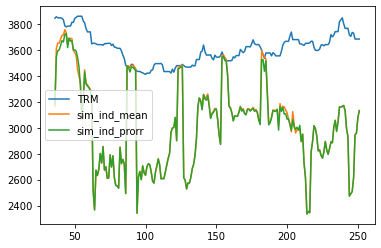

In [73]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_mean'].notnull()][['TRM','sim_ind_mean','sim_ind_prorr']].plot()

## 2.  buscar ley de potencia con tabla transacciones

In [74]:
DF_TRANSACCIONES

,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso,importe
0,756,559,1.436715e+04,2267.897013,36,3.258322e+07
1,916,281,4.800269e+04,2333.383350,36,1.120087e+08
2,138,281,1.404818e+03,2333.383350,36,3.277979e+06
3,533,281,2.043318e+04,2333.383350,36,4.767844e+07
4,497,281,1.067599e+04,2333.383350,36,2.491117e+07
...,...,...,...,...,...,...
103876,718,1880,4.724258e+06,3133.171501,251,1.480191e+10
103877,2849,1880,1.566803e+05,3133.171501,251,4.909062e+08
103878,555,1880,1.798042e+08,3133.171501,251,5.633573e+11
103879,1629,1880,2.308484e+03,3133.171501,251,7.232875e+06


### Análisis Compradores

<AxesSubplot:>

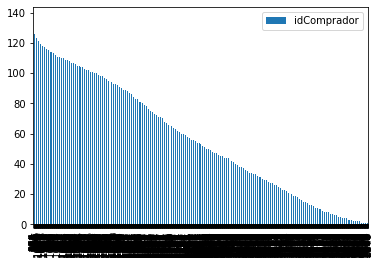

In [75]:
DF_TRANSACCIONES['idComprador'].value_counts().to_frame().plot.bar()

<AxesSubplot:>

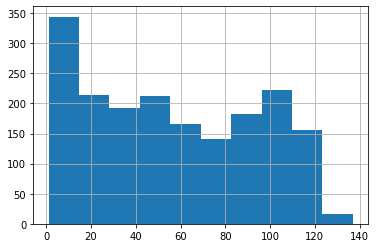

In [76]:
DF_TRANSACCIONES['idComprador'].value_counts().hist()

<AxesSubplot:>

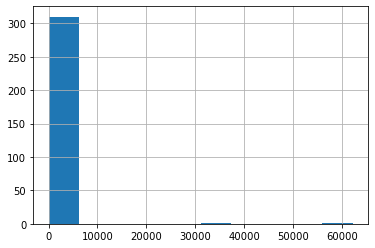

In [77]:
DF_TRANSACCIONES['idVendedor'].value_counts().hist()

## Comportamiento Agentes específicos

In [78]:
df_estadoAgentes['id'].value_counts().to_frame('numTrans')

,numTrans
1,217
609,217
643,217
640,217
639,217
...,...
2755,1
1239,1
2082,1
2617,1


In [79]:
agente_longevo=df_estadoAgentes['id'].value_counts().to_frame('numTrans').index[0]
agente_longevo

1

In [80]:
#df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])]

In [81]:
df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])].set_index('pulso')

,id,TIPO,edad,capital,stockProducto,val_stock,val_empresa
pulso,,,,,,,
35,1,Comprador,0,9.004924e+08,355992.000000,1.368287e+09,1.232132e+18
36,1,Comprador,1,1.034547e+09,322039.150075,1.237786e+09,2.272333e+09
37,1,Comprador,2,1.119899e+09,292194.394267,9.246659e+08,2.044564e+09
38,1,Comprador,3,1.207532e+09,265218.385643,9.574348e+08,2.164967e+09
39,1,Comprador,4,1.291355e+09,238602.629120,8.714782e+08,2.162833e+09
...,...,...,...,...,...,...,...
247,1,Comprador,212,1.730023e+07,278.697934,6.990497e+05,1.799928e+07
248,1,Comprador,213,1.694210e+07,250.729449,6.557611e+05,1.759786e+07
249,1,Comprador,214,1.647193e+07,269.046723,7.931168e+05,1.726504e+07


<AxesSubplot:xlabel='pulso'>

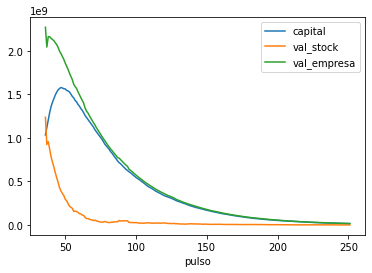

In [82]:
df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])].set_index('pulso')[['capital','val_stock','val_empresa']][1:].plot()

<AxesSubplot:xlabel='pulso'>

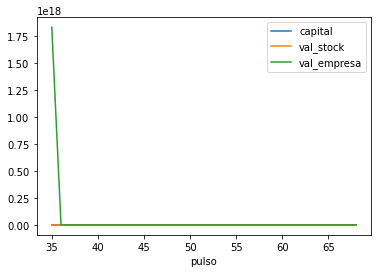

In [83]:
df_estadoAgentes[df_estadoAgentes['id'].isin([329])].set_index('pulso')[['capital','val_stock','val_empresa']].plot()

### Numero de transacciones por día

In [85]:
DF_TRANSACCIONES['fechaPulso'].value_counts().to_frame('transDiarias').sort_index()

,transDiarias
36,238
37,298
38,288
39,278
40,265
...,...
247,751
248,750
249,746
250,739


<AxesSubplot:>

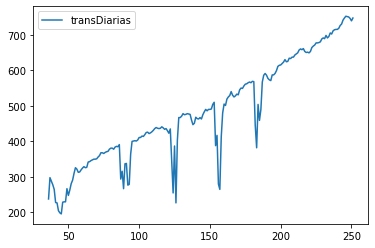

In [86]:
DF_TRANSACCIONES['fechaPulso'].value_counts().to_frame('transDiarias').sort_index().plot()

In [87]:
## caracteristicas mejores agentes

In [88]:
## distribución mejores agentes en el tiempo

In [89]:
#exponente de hurst trm calculada

In [94]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO]

,Date,date,TRM,sim_ind_mean,sim_ind_prorr
37,2020-10-16,2020-10-16,3854.47,3609.986634,3546.969350
38,2020-10-17,2020-10-17,3846.48,3652.425139,3592.537315
39,2020-10-18,2020-10-18,3846.48,3651.417292,3599.594416
40,2020-10-19,2020-10-19,3846.48,3682.358134,3633.060107
41,2020-10-20,2020-10-20,3842.76,3712.254059,3670.711970
...,...,...,...,...,...
247,2021-05-14,2021-05-14,3728.09,2615.413057,2615.413057
248,2021-05-15,2021-05-15,3682.84,2947.877698,2944.484349
249,2021-05-16,2021-05-16,3682.84,2959.512261,2957.490974
250,2021-05-17,2021-05-17,3682.84,3079.202712,3076.785698


In [90]:
from hurst import compute_Hc

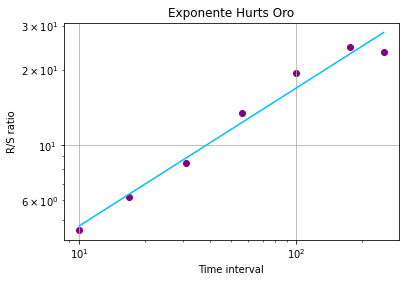

H=0.5528, c=1.3288


In [91]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion['TRM'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

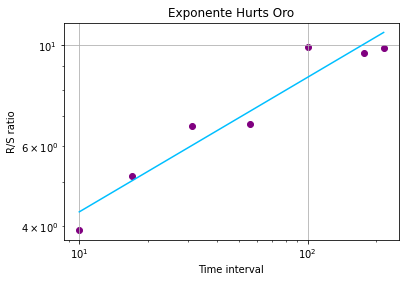

H=0.2960, c=2.1784


In [95]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO]['sim_ind_prorr'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))